In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\New folder\mail_data.csv")

In [4]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.dtypes

Category    object
Message     object
dtype: object

In [8]:
data.Category.unique()

array(['ham', 'spam'], dtype=object)

In [9]:
data.Message.unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

<Axes: xlabel='Category', ylabel='count'>

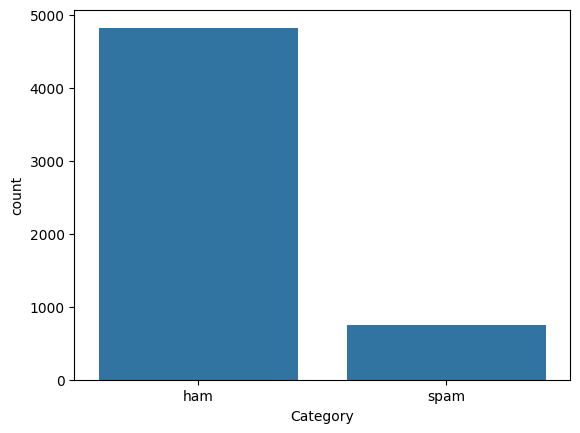

In [10]:
sns.countplot(x=data.Category)

In [11]:

data['catagories'] = data['Category'].map({'spam': 1, 'ham': 0})  


x = data['Message']
y = data['catagories']


In [12]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2)

In [13]:
data

,Category,Message,catagories
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [14]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer=CountVectorizer(stop_words='english')
X_train_vector = vectorizer.fit_transform(xtr)
X_test_vector = vectorizer.transform(xts)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


model = MultinomialNB()
model.fit(X_train_vector, ytr)

y_pred = model.predict(X_test_vector)

In [20]:
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(yts, y_pred))

print(classification_report(yts, y_pred))


Test Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       957
           1       0.97      0.92      0.94       158

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [21]:
import pickle
with open('spam_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [23]:
import pickle

# 1. Load the saved vectorizer
with open('vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

# 2. Load the saved model
with open('spam_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 3. Input a sample text
sample_text = ["Congratulations! You've won a free ticket."]

# 4. Transform the text using the loaded vectorizer
vector = loaded_vectorizer.transform(sample_text)

# 5. Predict using the loaded model
prediction = loaded_model.predict(vector)


print("🔍 Prediction:", prediction)


🔍 Prediction: [1]
